In [1]:

import pandas as pd
df = pd.read_csv("pca.csv")

# Prepare X and Y
X = df.values[:,0]
Y = df.values[:,-1]

df.head()

,X,Y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0


In [2]:
df

,X,Y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


In [3]:
X_standard = X - X.mean()
X_standard

array([ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
       -0.71])

In [4]:
type(X_standard)

numpy.ndarray

In [5]:
Y_standard = Y-Y.mean()
Y_standard

array([ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
       -1.01])

In [6]:
type(Y_standard)

numpy.ndarray

In [7]:
import numpy as np
data = np.stack([X_standard,Y_standard],axis=-1)   # pack the x & y data together in one 2D array

In [8]:
data

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [9]:
cov = np.cov(data.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

covariance matrix =
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [10]:
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)

In [48]:
lambdas

array([0.0490834 , 1.28402771])

In [12]:
vs

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [45]:
lambdas

array([0.0490834 , 1.28402771])

In [51]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(lambdas)[::-1]

In [52]:
sorted_index

array([1, 0], dtype=int64)

In [53]:
sorted_eigenvalue = lambdas[sorted_index] 

In [54]:
sorted_eigenvalue

array([1.28402771, 0.0490834 ])

In [15]:
sorted_eigenvectors = vs[:,sorted_index]

In [16]:
sorted_eigenvectors

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [17]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [18]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),data.transpose()).transpose()

In [19]:
print("Information/Variance in PC1",(sorted_eigenvalue[0]/(sorted_eigenvalue[0]+sorted_eigenvalue[1]))*100)

Information/Variance in PC1 96.31813143486458


In [20]:
X_reduced

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

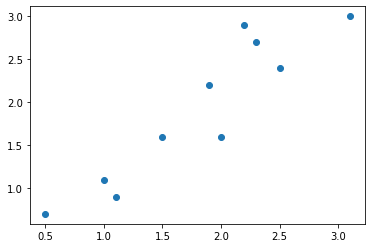

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

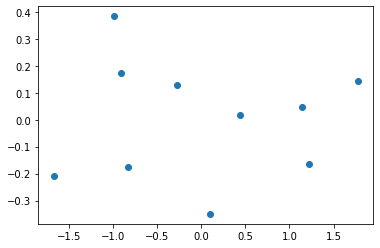

In [22]:
import matplotlib.pyplot as plt
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.scatter(X_reduced[:,0:1],X_reduced[:,-1])
plt.show()

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:,0:1])
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

# PCA Using Scikit Learn

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
breast = load_breast_cancer()

In [25]:
breast_data = breast.data

In [26]:
breast_labels = breast.target

In [27]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))

In [28]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [29]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [30]:
features = breast.feature_names

In [31]:
features_labels = np.append(features,'label')

In [32]:
breast_dataset.columns = features_labels

In [33]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [34]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [35]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [36]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [37]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [38]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

##### Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [39]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

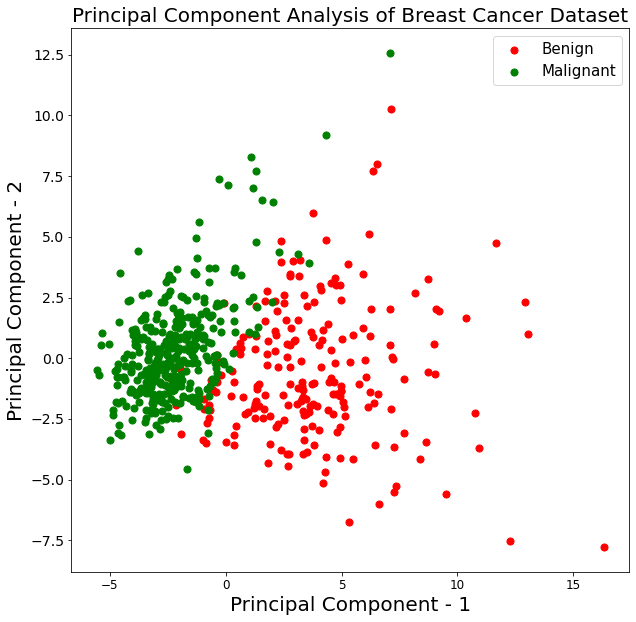

In [40]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()